## DATA IMPORTATION

In [1]:
#import Transaction Data
library(readxl) ## Library for importing excel files

In [2]:
trans <- read_excel(file.choose())

In [3]:
## Dimension of trans Data
dim(trans)

[1] 264836      8

In [4]:
## structure of trans data
str(trans)

tibble [264,836 x 8] (S3: tbl_df/tbl/data.frame)
 $ DATE          : POSIXct[1:264836], format: "2018-10-17" "2019-05-14" ...
 $ STORE_NBR     : num [1:264836] 1 1 1 2 2 4 4 4 5 7 ...
 $ LYLTY_CARD_NBR: num [1:264836] 1000 1307 1343 2373 2426 ...
 $ TXN_ID        : num [1:264836] 1 348 383 974 1038 ...
 $ PROD_NBR      : num [1:264836] 5 66 61 69 108 57 16 24 42 52 ...
 $ PROD_NAME     : chr [1:264836] "Natural Chip        Compny SeaSalt175g" "CCs Nacho Cheese    175g" "Smiths Crinkle Cut  Chips Chicken 170g" "Smiths Chip Thinly  S/Cream&Onion 175g" ...
 $ PROD_QTY      : num [1:264836] 2 3 2 5 3 1 1 1 1 2 ...
 $ TOT_SALES     : num [1:264836] 6 6.3 2.9 15 13.8 5.1 5.7 3.6 3.9 7.2 ...


In [5]:
## summary of trans data
summary(trans)

      DATE                       STORE_NBR     LYLTY_CARD_NBR   
 Min.   :2018-07-01 00:00:00   Min.   :  1.0   Min.   :   1000  
 1st Qu.:2018-09-30 00:00:00   1st Qu.: 70.0   1st Qu.:  70021  
 Median :2018-12-30 00:00:00   Median :130.0   Median : 130358  
 Mean   :2018-12-30 00:52:12   Mean   :135.1   Mean   : 135550  
 3rd Qu.:2019-03-31 00:00:00   3rd Qu.:203.0   3rd Qu.: 203094  
 Max.   :2019-06-30 00:00:00   Max.   :272.0   Max.   :2373711  
     TXN_ID           PROD_NBR       PROD_NAME            PROD_QTY      
 Min.   :      1   Min.   :  1.00   Length:264836      Min.   :  1.000  
 1st Qu.:  67602   1st Qu.: 28.00   Class :character   1st Qu.:  2.000  
 Median : 135138   Median : 56.00   Mode  :character   Median :  2.000  
 Mean   : 135158   Mean   : 56.58                      Mean   :  1.907  
 3rd Qu.: 202701   3rd Qu.: 85.00                      3rd Qu.:  2.000  
 Max.   :2415841   Max.   :114.00                      Max.   :200.000  
   TOT_SALES      
 Min.   :  1.50

Looks like there is an outlier. Let's investigate further

## DATA CLEANING

In [6]:
# Inspect and remove outlier
library(dplyr) #Package for data wrangling

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
trans %>% filter(TOT_SALES == 650)

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650
2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650


In [8]:
trans <- trans %>% filter(TOT_SALES != 650) #drop the rows with outlier

In [9]:
summary(trans) #inspect dataset again

      DATE                       STORE_NBR     LYLTY_CARD_NBR   
 Min.   :2018-07-01 00:00:00   Min.   :  1.0   Min.   :   1000  
 1st Qu.:2018-09-30 00:00:00   1st Qu.: 70.0   1st Qu.:  70021  
 Median :2018-12-30 00:00:00   Median :130.0   Median : 130357  
 Mean   :2018-12-30 00:52:10   Mean   :135.1   Mean   : 135549  
 3rd Qu.:2019-03-31 00:00:00   3rd Qu.:203.0   3rd Qu.: 203094  
 Max.   :2019-06-30 00:00:00   Max.   :272.0   Max.   :2373711  
     TXN_ID           PROD_NBR       PROD_NAME            PROD_QTY    
 Min.   :      1   Min.   :  1.00   Length:264834      Min.   :1.000  
 1st Qu.:  67601   1st Qu.: 28.00   Class :character   1st Qu.:2.000  
 Median : 135137   Median : 56.00   Mode  :character   Median :2.000  
 Mean   : 135158   Mean   : 56.58                      Mean   :1.906  
 3rd Qu.: 202700   3rd Qu.: 85.00                      3rd Qu.:2.000  
 Max.   :2415841   Max.   :114.00                      Max.   :5.000  
   TOT_SALES     
 Min.   : 1.500  
 1st Qu.: 5.

Looks better!!!

In [10]:
## Convert Store Number and Loyalty Card number Column to categorical variable
trans$STORE_NBR <- as.factor(trans$STORE_NBR)
trans$LYLTY_CARD_NBR <- as.factor(trans$LYLTY_CARD_NBR)
str(trans[2:3])

tibble [264,834 x 2] (S3: tbl_df/tbl/data.frame)
 $ STORE_NBR     : Factor w/ 272 levels "1","2","3","4",..: 1 1 1 2 2 4 4 4 5 7 ...
 $ LYLTY_CARD_NBR: Factor w/ 72636 levels "1000","1002",..: 1 204 225 580 615 1097 1172 1219 1428 2117 ...


In [11]:
# import Customer Data
cust <- read.csv(file.choose())
head(cust)

LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
1000,YOUNG SINGLES/COUPLES,Premium
1002,YOUNG SINGLES/COUPLES,Mainstream
1003,YOUNG FAMILIES,Budget
1004,OLDER SINGLES/COUPLES,Mainstream
1005,MIDAGE SINGLES/COUPLES,Mainstream
1007,YOUNG SINGLES/COUPLES,Budget


In [12]:
dim(cust) # Dimension of customer Data

[1] 72637     3

In [13]:
str(cust)# Structure of customer Data

'data.frame':	72637 obs. of  3 variables:
 $ LYLTY_CARD_NBR  : int  1000 1002 1003 1004 1005 1007 1009 1010 1011 1012 ...
 $ LIFESTAGE       : Factor w/ 7 levels "MIDAGE SINGLES/COUPLES",..: 7 7 6 4 1 7 2 7 4 3 ...
 $ PREMIUM_CUSTOMER: Factor w/ 3 levels "Budget","Mainstream",..: 3 2 1 2 2 1 3 2 2 2 ...


## EXPLORATORY DATA ANALYSIS

In [20]:
## Convert Loyalty card number column to categorical variable in cust dataset
cust$LYLTY_CARD_NBR <- factor(cust$LYLTY_CARD_NBR)

In [25]:
df <- inner_join(trans, cust, by = 'LYLTY_CARD_NBR') ## Join the data sets using inner_join

In [26]:
head(df)

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget


In [27]:
summary(df) # summary of df

      DATE                       STORE_NBR      LYLTY_CARD_NBR  
 Min.   :2018-07-01 00:00:00   226    :  2020   162039 :    18  
 1st Qu.:2018-09-30 00:00:00   88     :  1873   172032 :    18  
 Median :2018-12-30 00:00:00   93     :  1832   13138  :    17  
 Mean   :2018-12-30 00:52:33   165    :  1819   116181 :    17  
 3rd Qu.:2019-03-31 00:00:00   237    :  1785   128178 :    17  
 Max.   :2019-06-30 00:00:00   43     :  1771   230078 :    17  
                               (Other):253728   (Other):264724  
     TXN_ID           PROD_NBR       PROD_NAME            PROD_QTY    
 Min.   :      1   Min.   :  1.00   Length:264828      Min.   :1.000  
 1st Qu.:  67599   1st Qu.: 28.00   Class :character   1st Qu.:2.000  
 Median : 135139   Median : 56.00   Mode  :character   Median :2.000  
 Mean   : 135158   Mean   : 56.58                      Mean   :1.906  
 3rd Qu.: 202701   3rd Qu.: 85.00                      3rd Qu.:2.000  
 Max.   :2415841   Max.   :114.00                     

In [28]:
## Create DAYS, MONTHS AND YEARS columns
library(lubridate) #Package for processing Datetime variables

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



In [29]:
df$WEEK_DAY <- wday(df$DATE, label = TRUE) # Weekdays
head(df$WEEK_DAY)

[1] Wed Tue Mon Fri Sat Sun
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

In [30]:
df$MONTHS <- month(df$DATE, label = TRUE) #Months
head(df$MONTHS)

[1] Oct May May Aug Aug May
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

In [81]:
df$YEARS <- year(df$DATE) # Years
head(df$YEARS)

[1] 2018 2019 2019 2018 2018 2019

In [31]:
# Frequency distribution of Total Sales
library(ggplot2) #Import visualization library

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

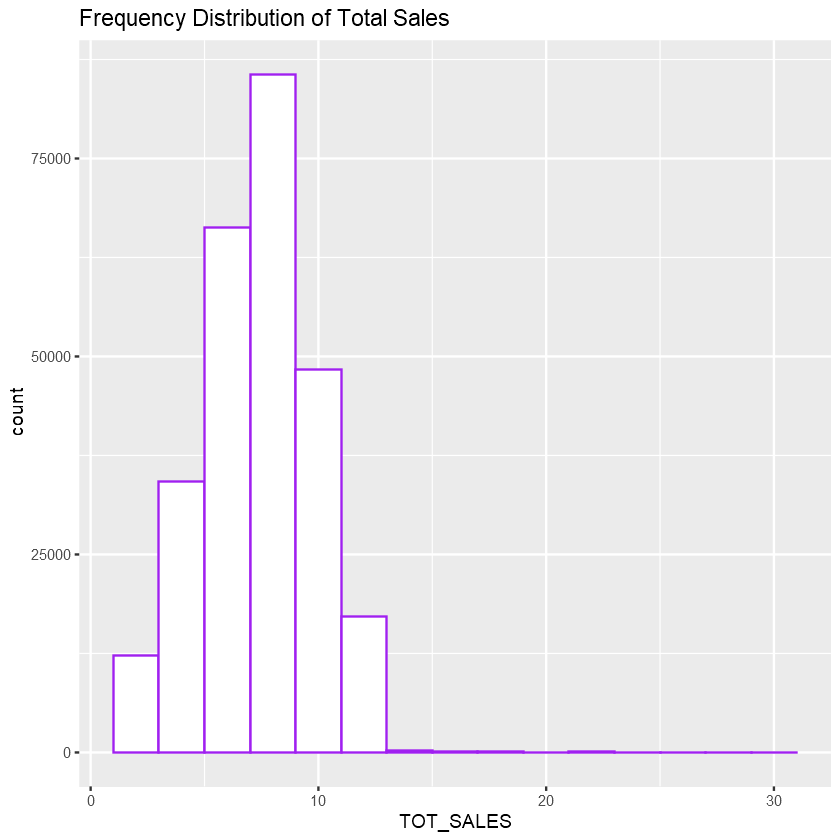

In [56]:
ggplot(df, aes(x = TOT_SALES)) + geom_histogram( bins = 15, fill = 'white', colour = "purple")  +
    ggtitle("Frequency Distribution of Total Sales")

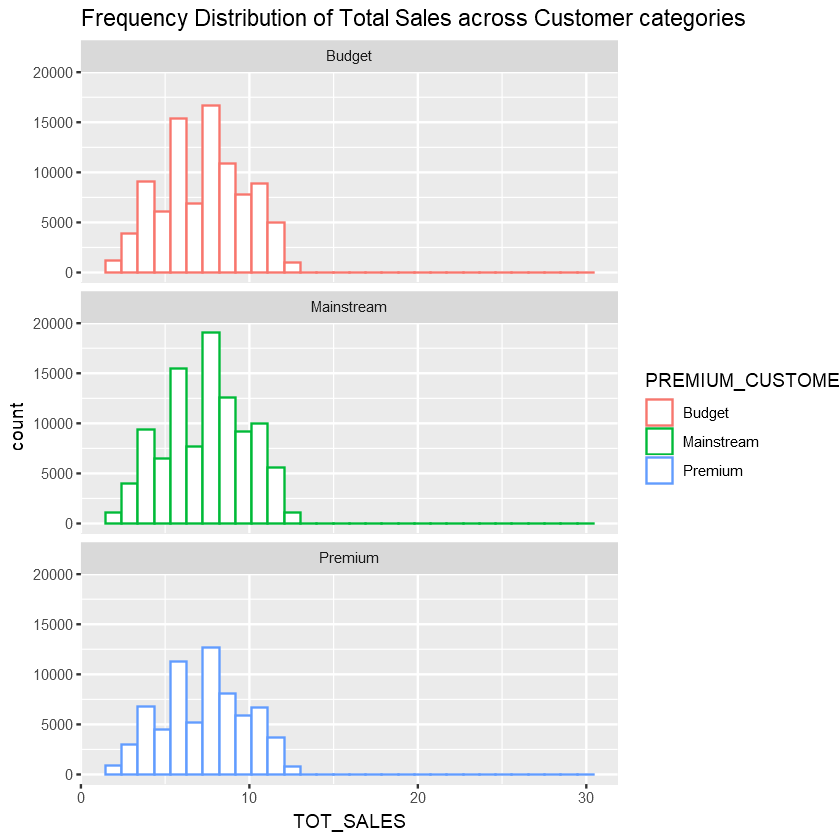

In [53]:
ggplot(df, aes(x = TOT_SALES, colour = PREMIUM_CUSTOMER)) + geom_histogram( bins = 30, fill = 'white') +
    ggtitle("Frequency Distribution of Total Sales across Customer categories") + facet_wrap(~PREMIUM_CUSTOMER, nrow = 3)

The frequency distribution across the 3 customer categories is right skewed and very similar.

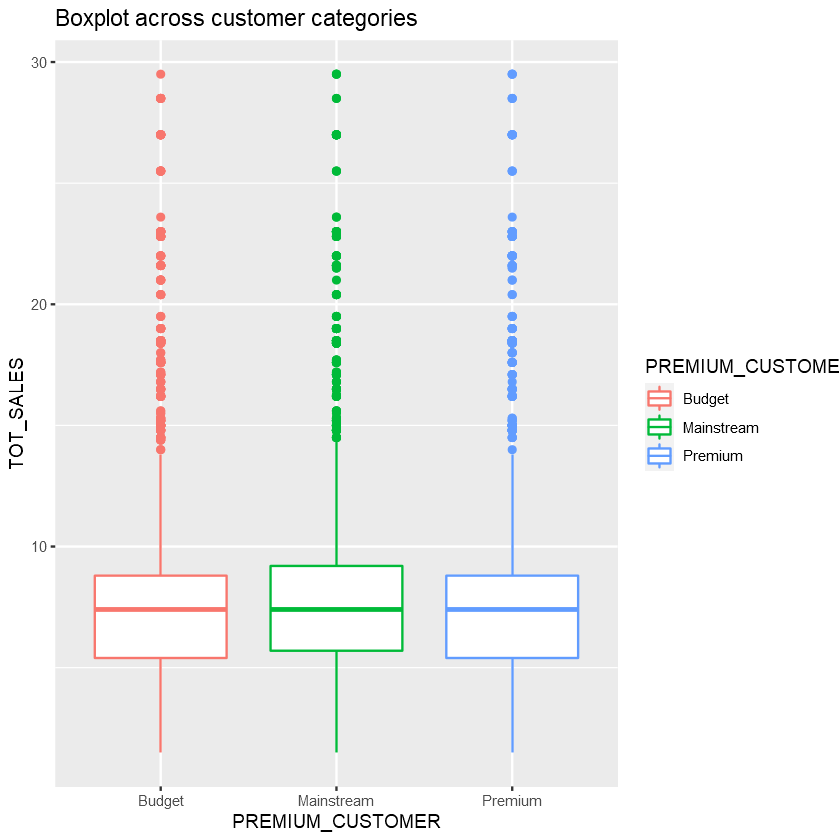

In [66]:
## Boxplot across customer categories
ggplot(df) + geom_boxplot(aes(x = PREMIUM_CUSTOMER, y = TOT_SALES, colour = PREMIUM_CUSTOMER)) + ggtitle('Boxplot across customer categories')

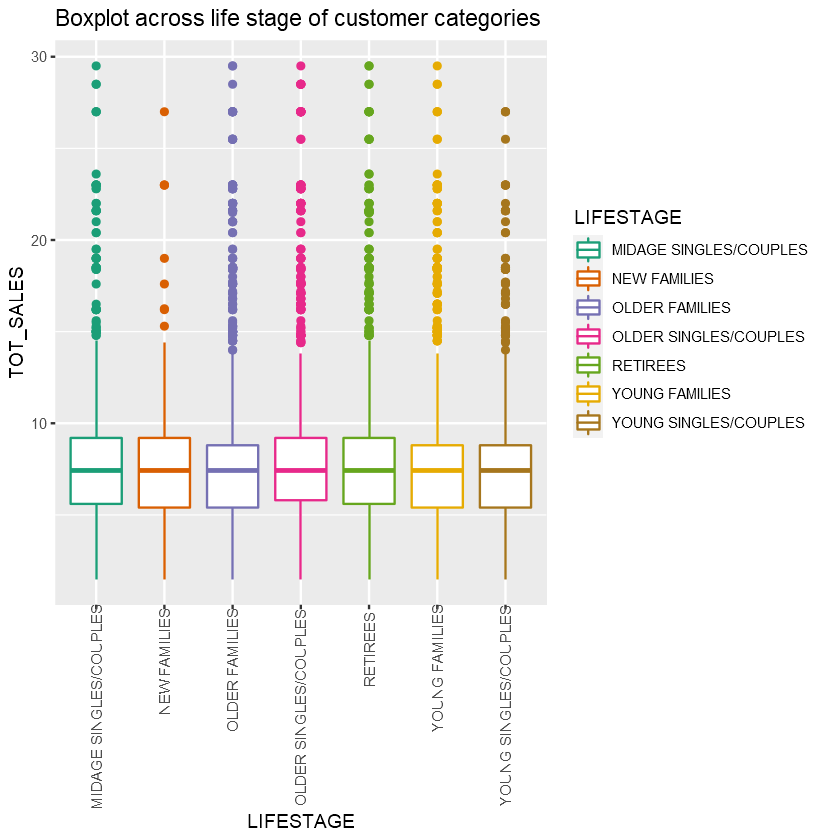

In [72]:
## Boxplot across life stage of customer categories

ggplot(df) + geom_boxplot(aes(x = LIFESTAGE, y = TOT_SALES, colour = LIFESTAGE)) + 
    ggtitle('Boxplot across life stage of customer categories') + scale_x_discrete(guide = guide_axis(angle = 90)) + scale_color_brewer(palette="Dark2")

Distribution of Total Sales across each customer's Life stage is fairly similar

In [139]:
# Top 20 performing customers
(top_cust <- df %>% group_by(LYLTY_CARD_NBR) %>% summarise(AVG_SALES = mean(TOT_SALES)) %>%
    arrange(desc(AVG_SALES)) %>% head(20))

`summarise()` ungrouping output (override with `.groups` argument)


LYLTY_CARD_NBR,AVG_SALES
44350,29.50
66014,28.50
154199,28.50
29093,27.00
36221,27.00
54225,27.00
60198,27.00
82189,27.00
149267,27.00
68078,25.50


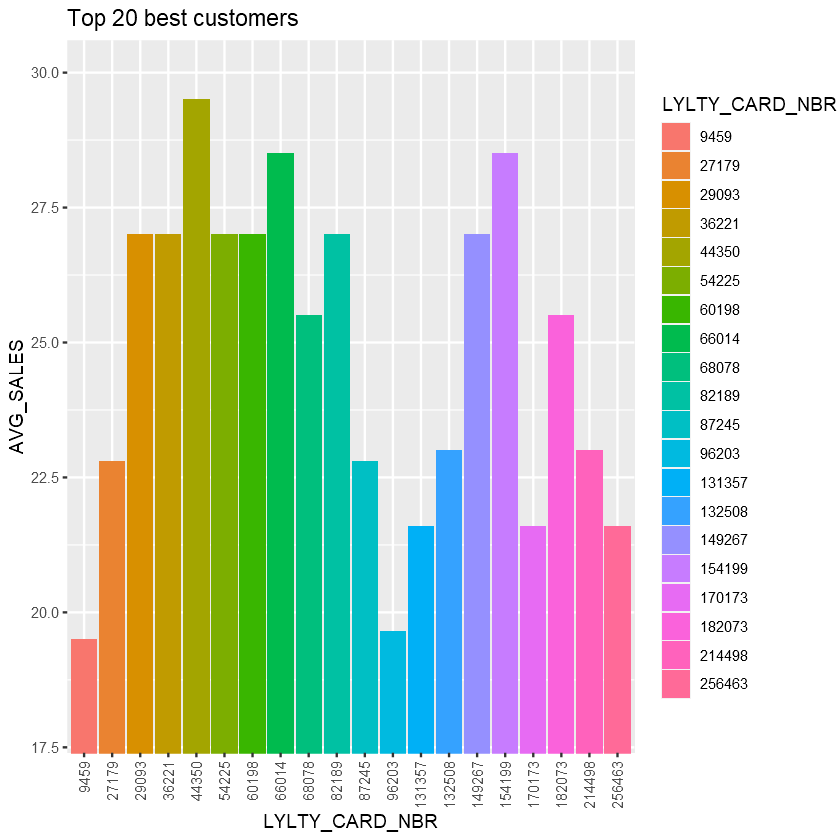

In [142]:
ggplot(top_cust) + geom_col(aes(x = LYLTY_CARD_NBR, y = AVG_SALES, fill = LYLTY_CARD_NBR)) + 
scale_x_discrete(guide = guide_axis(angle = 90)) + coord_cartesian(ylim = c(18, 30)) + ggtitle('Top 20 best customers')

customer with loyalty card number 44350 spent the most in this analysis

In [71]:
## Top ten performing Premium customers
(top_cust_prem <- df %>% filter(PREMIUM_CUSTOMER == 'Premium') %>% 
     group_by(LYLTY_CARD_NBR) %>% summarise(AVG_SALES = mean(TOT_SALES)) %>% arrange(desc(AVG_SALES)) %>% head(10))

`summarise()` ungrouping output (override with `.groups` argument)


LYLTY_CARD_NBR,AVG_SALES
29093,27.00000
170173,21.60000
256463,21.60000
242048,19.20000
264149,18.50000
34259,16.10000
84067,15.86667
148109,15.30000
12315,14.80000
84217,14.80000


In [73]:
## Top ten performing Mainstream customers
(df %>% filter(PREMIUM_CUSTOMER == 'Mainstream') %>% 
     group_by(LYLTY_CARD_NBR) %>% summarise(AVG_SALES = mean(TOT_SALES)) %>% arrange(desc(AVG_SALES)) %>% head(10))

`summarise()` ungrouping output (override with `.groups` argument)


LYLTY_CARD_NBR,AVG_SALES
54225,27.0
60198,27.0
82189,27.0
132508,23.0
214498,23.0
87245,22.8
9459,19.5
64064,18.5
111227,18.5
141276,18.5


In [74]:
## Top ten performing Budget customers
(df %>% filter(PREMIUM_CUSTOMER == 'Budget') %>% 
     group_by(LYLTY_CARD_NBR) %>% summarise(AVG_SALES = mean(TOT_SALES)) %>% arrange(desc(AVG_SALES)) %>% head(10))

`summarise()` ungrouping output (override with `.groups` argument)


LYLTY_CARD_NBR,AVG_SALES
44350,29.50
66014,28.50
154199,28.50
36221,27.00
149267,27.00
68078,25.50
182073,25.50
27179,22.80
131357,21.60
96203,19.65


Customers 29093, 54225, 44350 in Premium, Mainstream, Budget customer groups respectively spent the most.

In [75]:
# Which Customer group spends the most on chips?
df %>% group_by(PREMIUM_CUSTOMER) %>% summarise(AVG_SALES = mean(TOT_SALES)) %>% arrange(desc(AVG_SALES))

`summarise()` ungrouping output (override with `.groups` argument)


PREMIUM_CUSTOMER,AVG_SALES
Mainstream,7.361157
Premium,7.263111
Budget,7.258838


In [77]:
## Check the proportion of customers represented across this group
round(prop.table(table(df$PREMIUM_CUSTOMER))*100)


    Budget Mainstream    Premium 
        35         39         26 

Surprisingly Mainstream customers spent the most on chips, but this expected as we have an imbalanced dataset with Mainstream customers accounting for 39% of the total customers or maybe rich customers are just not interested in chips.

In [78]:
# Which life stage customer spends the most on chips?
df %>% group_by(LIFESTAGE) %>% summarise(AVG_SALES = mean(TOT_SALES)) %>% arrange(desc(AVG_SALES))

`summarise()` ungrouping output (override with `.groups` argument)


LIFESTAGE,AVG_SALES
OLDER SINGLES/COUPLES,7.386819
RETIREES,7.364434
MIDAGE SINGLES/COUPLES,7.357678
NEW FAMILIES,7.289124
OLDER FAMILIES,7.253307
YOUNG FAMILIES,7.252709
YOUNG SINGLES/COUPLES,7.158515


In [79]:
## Check the proportion of customers represented across this group
round(prop.table(table(df$LIFESTAGE))*100)


MIDAGE SINGLES/COUPLES           NEW FAMILIES         OLDER FAMILIES 
                     9                      3                     18 
 OLDER SINGLES/COUPLES               RETIREES         YOUNG FAMILIES 
                    21                     19                     16 
 YOUNG SINGLES/COUPLES 
                    14 

Old Singles/ Couples are the most interested in chips (interesting). Wonder why the young singles/couples don't like chips?

In [82]:
# What days do people buy chips the most
str(df$WEEK_DAY)

 Ord.factor w/ 7 levels "Sun"<"Mon"<"Tue"<..: 4 3 2 6 7 1 5 5 2 7 ...


In [83]:
df %>% group_by(WEEK_DAY) %>% summarise(AVG_SALES = mean(TOT_SALES)) %>% arrange(desc(AVG_SALES))

`summarise()` ungrouping output (override with `.groups` argument)


WEEK_DAY,AVG_SALES
Wed,7.316646
Fri,7.315779
Sun,7.298690
Mon,7.294861
Thu,7.292675
Sat,7.289025
Tue,7.287322


Wednessday has the highest average chips sales

In [119]:
## Monthly sales
## create month-year column
df$MONTH_YEAR <- format_ISO8601(df$DATE, precision = "ym")
head(df$MONTH_YEAR)

[1] "2018-10" "2019-05" "2019-05" "2018-08" "2018-08" "2019-05"

In [120]:
(sale_month <- df %>% group_by(MONTH_YEAR) %>% summarise(TOTAL = sum(TOT_SALES)))

`summarise()` ungrouping output (override with `.groups` argument)


MONTH_YEAR,TOTAL
2018-07,165275.3
2018-08,158064.2
2018-09,160522.0
2018-10,164415.7
2018-11,160230.7
2018-12,167908.6
2019-01,162642.3
2019-02,150665.0
2019-03,166260.0
2019-04,159845.1


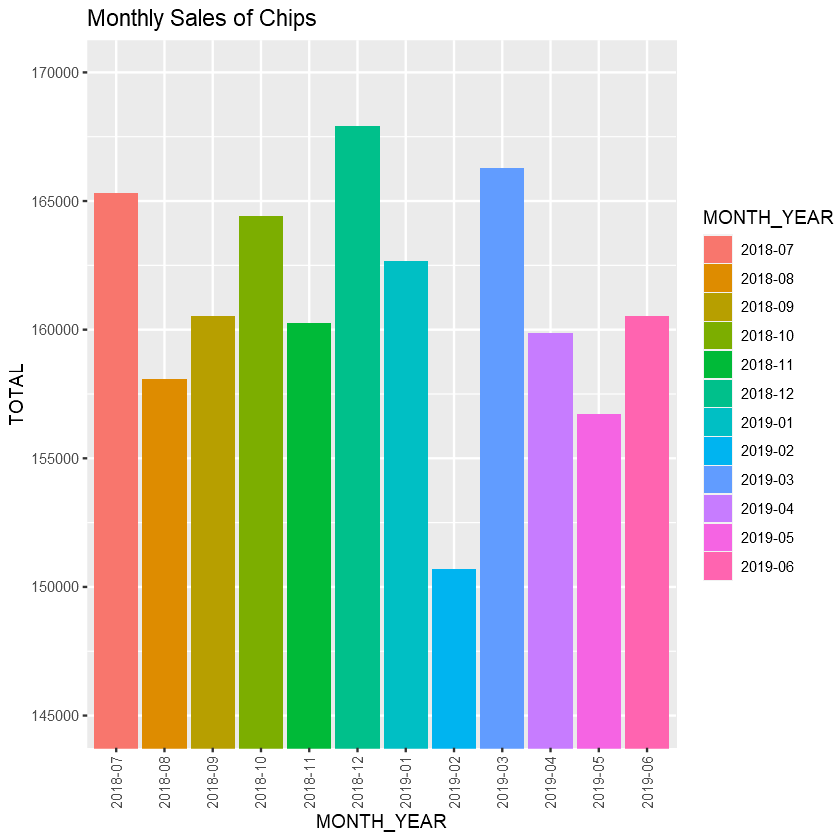

In [144]:
ggplot(sale_month) + geom_col(aes(x = MONTH_YEAR, y = TOTAL, fill = MONTH_YEAR)) +
    scale_x_discrete(guide = guide_axis(angle = 90)) + coord_cartesian(ylim = c(145000, 170000)) +
        ggtitle("Monthly Sales of Chips")

December 2018 had the highest sales.

In [160]:
# What chip sizes are the most bought?
## Create a new column having chip sizes
suppressWarnings(library(tidyverse)) 

In [166]:
df$SIZE <- extract_numeric(df$PROD_NAME)


extract_numeric() is deprecated: please use readr::parse_number() instead


In [167]:
head(df$SIZE)

[1] 175 175 170 175 150 300

In [169]:
df$SIZE <- factor(df$SIZE)
str(df$SIZE)

 Factor w/ 21 levels "70","90","110",..: 11 11 10 11 7 19 20 15 7 15 ...


In [170]:
df %>% group_by(SIZE) %>% summarise(AVG_SALES = mean(TOT_SALES)) %>% arrange(desc(AVG_SALES))

`summarise()` ungrouping output (override with `.groups` argument)


SIZE,AVG_SALES
380,11.754925
330,10.908636
270,8.818679
250,8.234995
135,8.010562
300,7.472971
170,7.339889
175,7.311905
110,7.270517
134,7.077344


380g had the most sales